In [1]:
from opendataval.dataloader import mix_labels_train

from DIOOB import DIOOB

from opendataval.experiment import ExperimentMediator

import torch

In [2]:
dataset_name = "digits"
train_count, valid_count, test_count = 700, 70, 1000
noise_rate = 0.2
noise_kwargs = {'noise_rate': noise_rate}
train_kwargs = {}
model_name = "sklogreg"
metric_name = "accuracy"

exper_med = ExperimentMediator.model_factory_setup(
    dataset_name=dataset_name,
    cache_dir="D:/Users/paper_code/output",
    force_download=False,
    train_count=train_count,
    valid_count=valid_count,
    test_count=test_count,
    add_noise=mix_labels_train,
    noise_kwargs=noise_kwargs,
    train_kwargs=train_kwargs,
    model_name=model_name,
    metric_name=metric_name,
    device=torch.device("cuda")
)

Base line model metric_name='accuracy': perf=0.7730000019073486


In [3]:
data_evaluators = [
    DIOOB(),
    
]

In [4]:
%%time
# compute data values.
exper_med = exper_med.compute_data_values(data_evaluators=data_evaluators)

1
data_val 0
refit it 0


 92%|█████████▏| 739/800 [00:27<00:02, 26.64it/s]


KeyboardInterrupt: 

In [5]:
from opendataval.experiment.exper_methods import (
    discover_corrupted_sample,
    noisy_detection,
    remove_high_low,
    save_dataval
)
from matplotlib import pyplot as plt

# Saving the results
output_dir = f"D:/Users/paper_code/output/tmp/{dataset_name}_{noise_rate=}/"
exper_med.set_output_directory(output_dir)
output_dir

'D:/Users/paper_code/output/tmp/digits_noise_rate=0.2/'

In [6]:
exper_med.evaluate(save_dataval, save_output=True)
exper_med.evaluate(noisy_detection, save_output=True)

ValueError: column must be nonempty

In [ ]:
fig = plt.figure(figsize=(15, 40))
_, fig = exper_med.plot(discover_corrupted_sample, fig, col=2, save_output=True)

In [7]:
fig = plt.figure(figsize=(15, 30))
df_resp, fig = exper_med.plot(remove_high_low, fig, include_train=True, col=2, save_output=True)

AttributeError: 'ExperimentMediator' object has no attribute 'num_data_eval'

<Figure size 1500x3000 with 0 Axes>

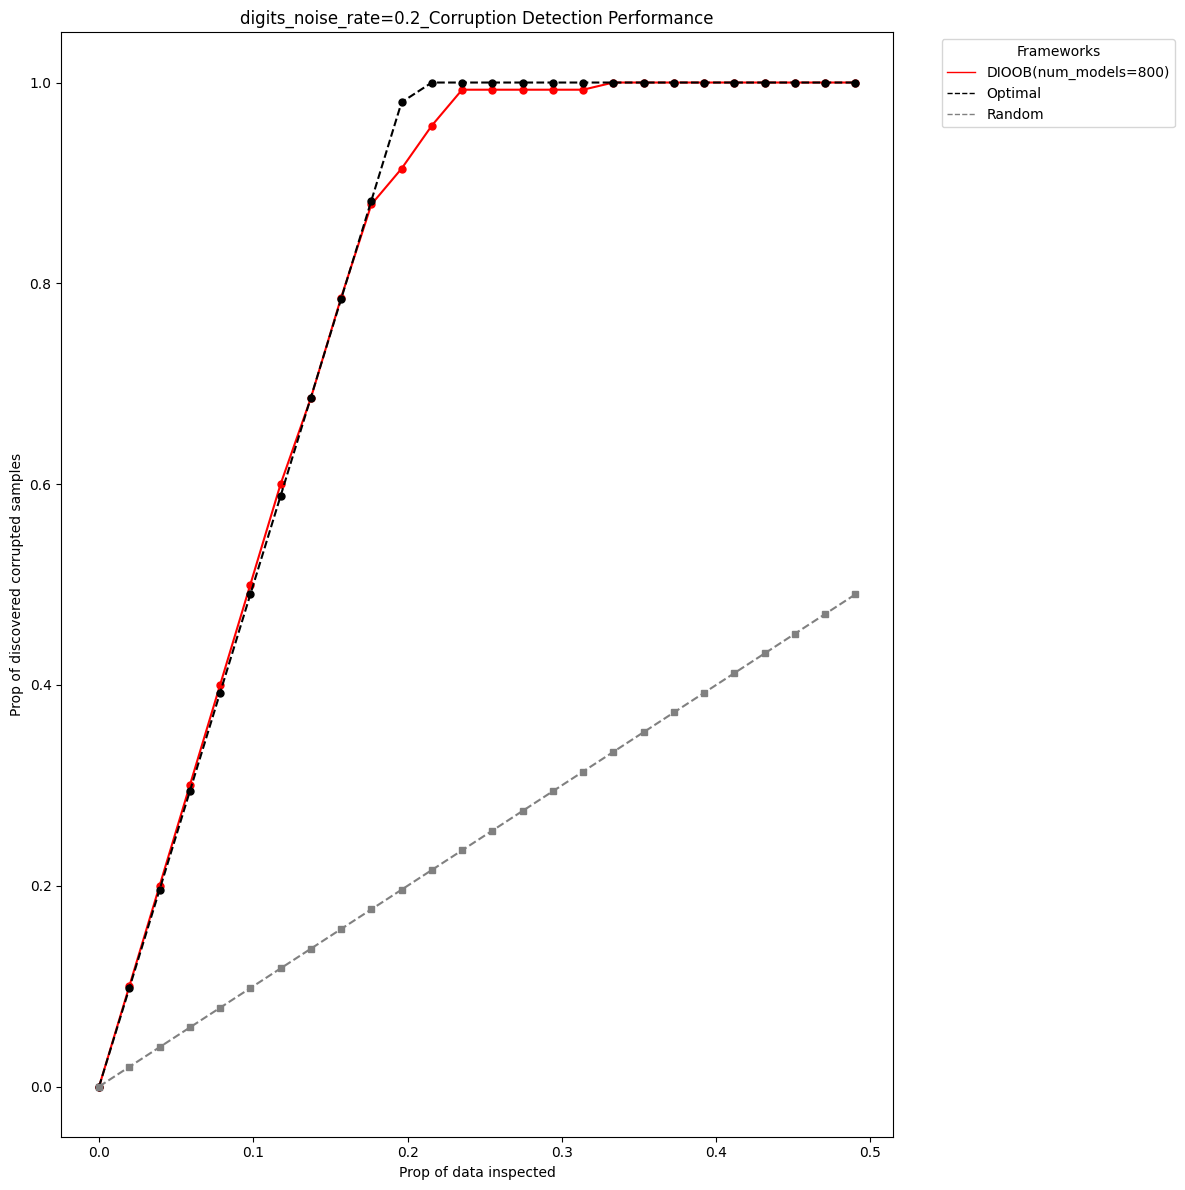

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


dir = f"D:/Users/paper_code/output/tmp/{dataset_name}_{noise_rate=}/discover_corrupted_sample.csv"
df = pd.read_csv(dir)
new_column_names = ['Framework', 'Corrupt_found', 'x_axis', 'optimal', 'random']
df.columns = new_column_names


fig, ax = plt.subplots(figsize=(12, 12))


colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'lime','turquoise']
frameworks = df['Framework'].unique()

for i, framework in enumerate(frameworks):
    data = df[df['Framework'] == framework][:26]  
    color = colors[i % len(colors)]
    label = f'{framework} - Corrupt_found'
    ax.plot(data['x_axis'], data['Corrupt_found'], label=label, color=color, marker='o', markersize=5)


ax.plot(df['x_axis'][:26], df['optimal'][:26], label='Optimal', linestyle='--', color='black', marker='o', markersize=5)

ax.plot(df['x_axis'][:26], df['random'][:26], label='Random', linestyle='--', color='gray', marker='s', markersize=5)


ax.set_title(f'{dataset_name}_{noise_rate=}_Corruption Detection Performance')
ax.set_xlabel('Prop of data inspected')
ax.set_ylabel('Prop of discovered corrupted samples')


legend_labels = [plt.Line2D([0], [0], color=colors[i % len(colors)], lw=1, label=f'{framework}') for i, framework in enumerate(frameworks)]
legend_labels.append(plt.Line2D([0], [0], color='black', lw=1, linestyle='--', label='Optimal'))
legend_labels.append(plt.Line2D([0], [0], color='gray', lw=1, linestyle='--', label='Random'))


legend = ax.legend(handles=legend_labels, title='Frameworks', loc='upper left')
legend.set_bbox_to_anchor((1.05, 1))  

plt.tight_layout()


plt.show()


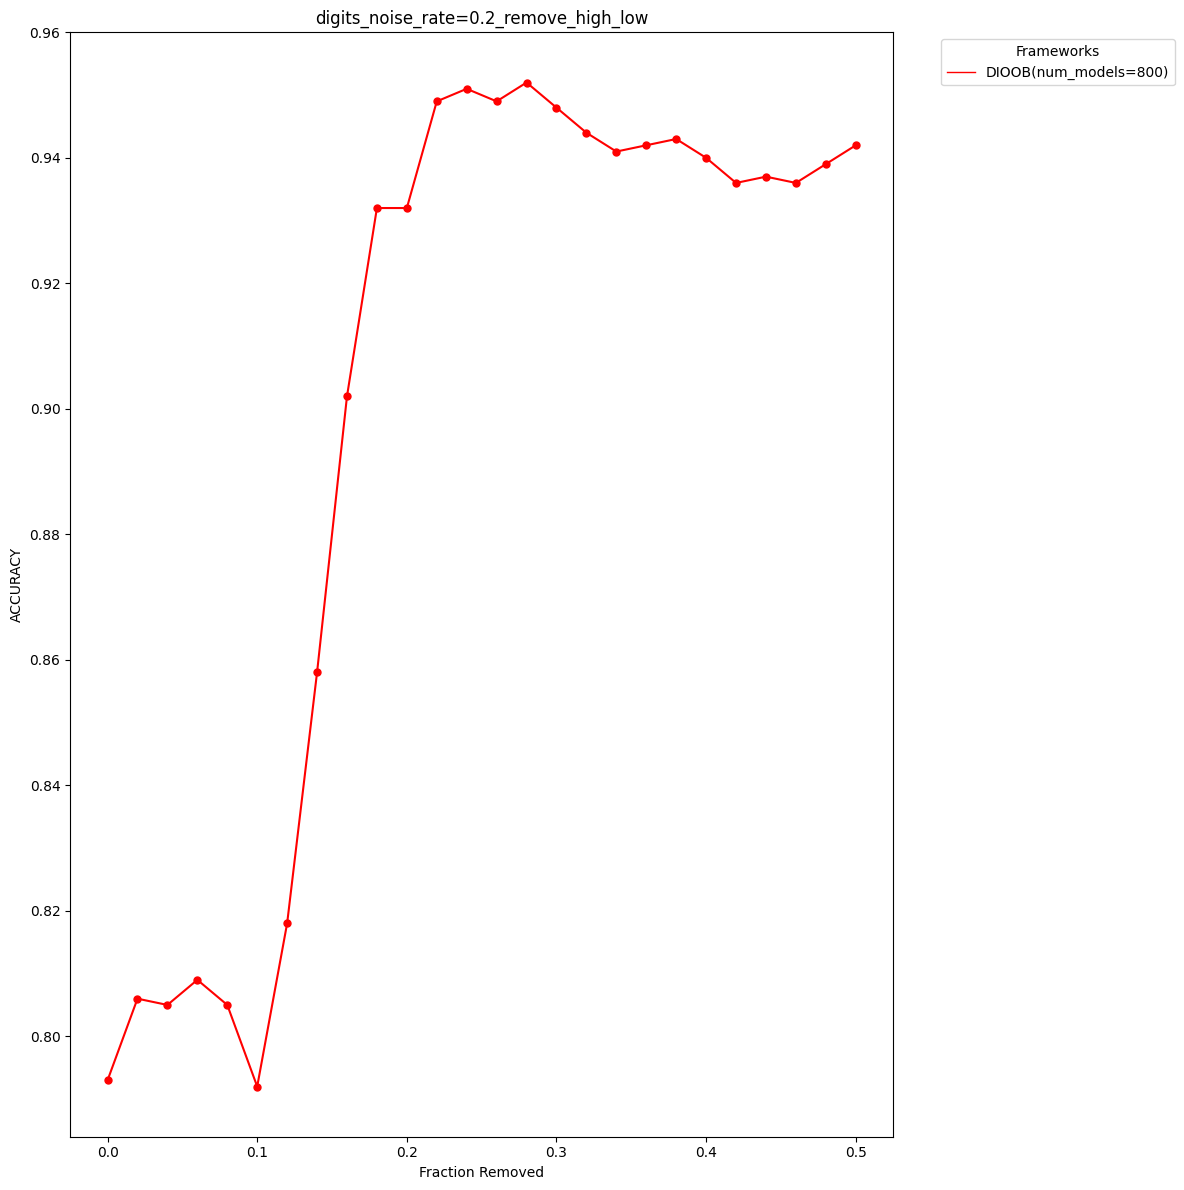

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
dir = f"D:/Users/paper_code/output/tmp/{dataset_name}_{noise_rate=}/remove_high_low.csv"
df = pd.read_csv(dir)
new_column_names = ['Framework', 'remove_least', 'remove_high', 'x_axis']
df.columns = new_column_names


fig, ax = plt.subplots(figsize=(12, 12))


colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'lime','turquoise']
frameworks = df['Framework'].unique()

for i, framework in enumerate(frameworks):
    data = df[df['Framework'] == framework][:26]  
    color = colors[i % len(colors)]

    
    label_least = f'{framework} - remove_least'
    ax.plot(data['x_axis'], data['remove_least'], label=label_least, color=color, marker='o', markersize=5)

    
ax.set_title(f'{dataset_name}_{noise_rate=}_remove_high_low')
ax.set_xlabel('Fraction Removed')
ax.set_ylabel('ACCURACY')


legend_labels = [plt.Line2D([0], [0], color=colors[i % len(colors)], lw=1, label=f'{framework}') for i, framework in enumerate(frameworks)]


legend = ax.legend(handles=legend_labels, title='Frameworks', loc='upper left')
legend.set_bbox_to_anchor((1.05, 1))  

plt.tight_layout()


plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
dir = f"D:/Users/paper_code/output/tmp/{dataset_name}_{noise_rate=}/remove_high_low.csv"
df = pd.read_csv(dir)
new_column_names = ['Framework', 'remove_least', 'remove_high', 'x_axis']
df.columns = new_column_names



fig, ax = plt.subplots(figsize=(12, 12))


colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray', 'cyan', 'magenta', 'lime','turquoise']
frameworks = df['Framework'].unique()

for i, framework in enumerate(frameworks):
    data = df[df['Framework'] == framework][:26]  
    color = colors[i % len(colors)]

    

    
    label_high = f'{framework} - remove_high'
    ax.plot(data['x_axis'], data['remove_high'], label=label_high, color=color, marker='s', markersize=5)


ax.set_title(f'{dataset_name}_{noise_rate=}_remove_high_low')
ax.set_xlabel('Fraction Removed')
ax.set_ylabel('ACCURACY')


legend_labels = [plt.Line2D([0], [0], color=colors[i % len(colors)], lw=1, label=f'{framework}') for i, framework in enumerate(frameworks)]


legend = ax.legend(handles=legend_labels, title='Frameworks', loc='upper left')
legend.set_bbox_to_anchor((1.05, 1))  

plt.tight_layout()


plt.show()

In [12]:
import pandas as pd
dir = f"D:/Users/paper_code/output/tmp/{dataset_name}_{noise_rate=}/noisy_detection.csv"
df = pd.read_csv(dir)

new_column_names = ['Framework', 'F1 Score']
df.columns = new_column_names

colors = ['red', 'blue', 'green', 'purple', 'orange', 'pink', 'brown', 'gray']#, 'cyan', 'magenta', 'lime','turquoise']


df['Color'] = colors
df['Framework'] = df['Framework'].str.replace(r'\(.*\)', '', regex=True)


min_size = 50
max_size = 200
df['Size'] = min_size + (max_size - min_size) * (df['F1 Score'] - df['F1 Score'].min()) / (df['F1 Score'].max() - df['F1 Score'].min())


plt.figure(figsize=(10, 6))
sc = plt.scatter(range(1, len(df) + 1), df['F1 Score'], s=df['Size'], alpha=0.7, c=df['Color'])
plt.xlabel('Framework')
plt.ylabel('F1 Score')
plt.title(f'{dataset_name}_{noise_rate=}_noisy_detection')


legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label=row['Framework'], markersize=10, markerfacecolor=row['Color']) for _, row in df.iterrows()]
legend = plt.legend(handles=legend_labels, title='Frameworks', loc='upper left')
legend.set_bbox_to_anchor((1.05, 1))  

plt.xticks(range(1, len(df) + 1), rotation=45)  
plt.tight_layout()


plt.show()

ValueError: Length of values (8) does not match length of index (1)